## 다항 선형 회귀 (Polynomial Linear Regression)

#### 1. 개념
- **정의**: 다항 선형 회귀는 독립 변수와 종속 변수 간의 비선형 관계를 모델링하기 위해 독립 변수의 다항식을 사용하는 회귀 분석 방법
- **목적**: 비선형 데이터에 대해 더 나은 예측을 제공하기 위해 독립 변수의 다항식을 추가함으로써 모델의 복잡성을 증가시킨다.

#### 2. 수학적 표현식
$$ y = \beta_0 + \beta_1x + \beta_2x^2 + \beta_3x^3 + \cdots + \beta_nx^n + \epsilon $$

#### 특징
- **비선형성**: 독립 변수와 종속 변수 간의 비선형 관계를 모델링할 수 있음.
- **유연성**: 다항식의 차수를 높임으로써 더 복잡한 패턴을 학습할 수 있음.
- **과적합**: 다항식의 차수가 너무 높으면 과적합이 발생할 수 있으며, 이는 모델의 일반화 성능을 저하시킬 수 있음.

#### 1. 샘플 데이터 생성

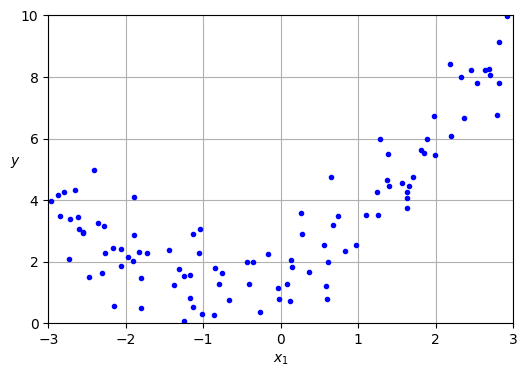

In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3                   # -3에서 3 사이의 임의의 값 100개
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)   # 2차 함수 활용. 잡음 추가됨.

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

#### 2. 선형회귀 모델 적용

In [4]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

lin_pred = lin_reg.predict(X)

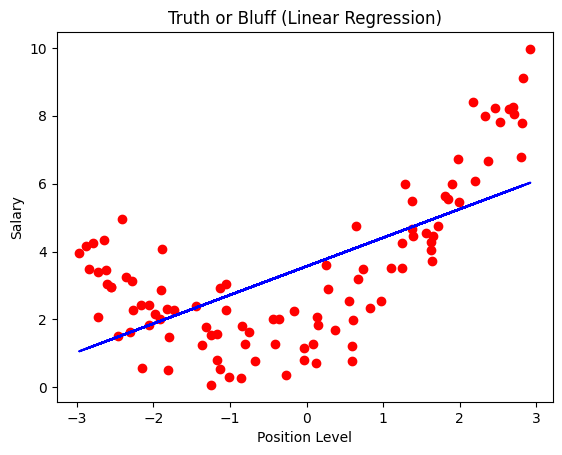

In [5]:
# Visualising the Linear Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_pred, color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

#### 3. 다항 회귀 모델 적용

In [48]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False) # include_bias -> 0차항 출력 여부
x_poly = poly.fit_transform(X)

## 차수 확인
print(poly.get_feature_names_out())

print(X[0])

print(x_poly[0])

['x0' 'x0^2']
[-0.75275929]
[-0.75275929  0.56664654]


In [49]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_poly, y)

LinearRegression()

In [50]:
## -3 ~ 3 구간까지 100개의 간격으로 나눔
xx = np.linspace(-3, 3, 100)
## 도출된 다항회귀 식에 맞게 데이터를 transform 하기 위해 배열 형태 변경
xx = xx.reshape(100, 1)

xx_poly = poly.transform(xx)

y_pred = lr.predict(xx_poly)

In [51]:
# 계수와 상수 출력
coef = lr.coef_
intercept = lr.intercept_

print(f"계수: {coef}")
print(f"상수: {intercept}")

계수: [[0.93366893 0.56456263]]
상수: [1.78134581]


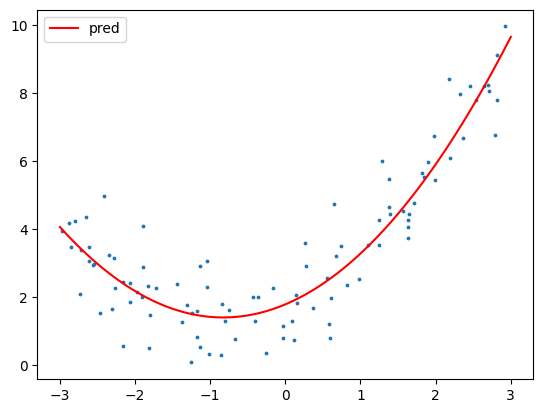

In [52]:
plt.scatter(X, y, s=3)
plt.plot(xx, y_pred, 'r-', label = 'pred')
plt.legend()
plt.show()

In [53]:
# 고차 함수 그래프 그리기
def polynomial_function(X):
    return coef[0, 0] * X**2 + coef[0, 1] * X + intercept

y_curve = polynomial_function(xx)


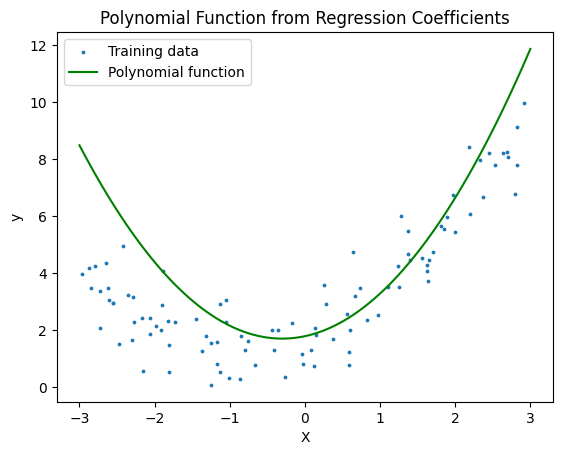

In [54]:
plt.scatter(X, y, s=3, label='Training data')
plt.plot(xx, y_curve, 'g-', label='Polynomial function')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Polynomial Function from Regression Coefficients")
plt.show()